### In this project my aim is to build a machine learning model that will best predict the survival of the passengers aboard the famous Titanic Ship that sank.

#### It is a knowledge based open machine learning competition on kaggle.com

Project done by _**Moses Egbo**_

#### Data Source: data was provided by kaggle.com 

For this project am provided with two datasets. 

The data has been split into two groups:
training set (train.csv)
test set (test.csv)

The training set should be used to build the machine learning models as it has the outcome(ground truth) contained it.

The test set should be used to see how well the model performs on unseen data. For the test set,there is no outcome for the passengers.

The outcome in this context means the result and for this project the outcome is a of binary classification type that is Yes or No. 1 or 0
which can be summarized to 1 if the passenger survived and 0 if the passenger didn't.

### The analysis for this project will follow 

+ Data Understanding
+ Data Preparation
+ Data Modelling
+ Result

In [1]:
# Importing the tools and the needed libraries
import seaborn as sns
sns.set_style('whitegrid')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings(action="ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


%matplotlib inline

In [2]:
test_df = pd.read_csv("test.csv",index_col='PassengerId')

In [3]:
df = pd.read_csv("train.csv",index_col='PassengerId')

## Exploratory Data Analysis

In [4]:
# Inspecting the dataframe
df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


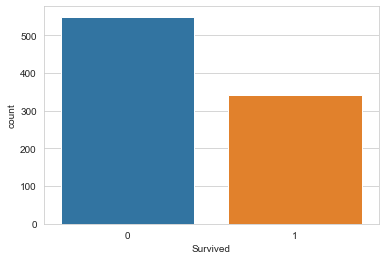

In [7]:
sns.countplot('Survived', data=df)

In [8]:
# Calculating the percentage of the survivors 
100.0*df['Survived'].value_counts() / len(df)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

From the percentage 61.62% did not survive and 38.38% survived

In [9]:
df.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [10]:
# Analysing features and the target column

df[['Pclass','Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
df[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values('Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


From the above 62% of those in PClass 1 survived. More females survived more than males and for the sibling those that has lesser siblings survived.

In [13]:
df[['Embarked','Survived']].groupby('Embarked', as_index=False).mean().sort_values('Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [14]:
100.0*df['Embarked'].value_counts() / len(df)

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

People that embarked at point S are the highest and they have the highest number of survivors 55%

## Feature Engineering

In [15]:
# Extracting title from the Name feature

df['Title'] = df.Name.str.extract('([A-Za-z]+)\.')
test_df['Title'] = test_df.Name.str.extract('([A-Za-z]+)\.')

In [16]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [17]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [18]:
df.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Ms            1
Sir           1
Capt          1
Countess      1
Mme           1
Lady          1
Jonkheer      1
Don           1
Name: Title, dtype: int64

In [19]:
# Comparing Titles with the Sex feature to figure out how rarely used titles can be merged with other titles

pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
replace_titles = ['Capt','Col','Countess','Don','Jonkheer','Lady','Major','Dr','Rev','Sir']

df['Title'] = df['Title'].replace(replace_titles, 'other')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [21]:
pd.crosstab(test_df['Title'], test_df['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [22]:
test_df['Title'] = test_df['Title'].replace(replace_titles, 'other')
test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')

In [23]:
# Adding new title Dona in test set to others

test_df['Title'] = test_df['Title'].replace('Dona', 'other')

In [24]:
# Check for missing values

df.isnull().sum().sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Title         0
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

In [25]:
test_df.isnull().sum().sort_values(ascending=False)

Cabin       327
Age          86
Fare          1
Title         0
Embarked      0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
dtype: int64

In [26]:
# Checking and filling the missing ages based on mean by title for the train set

print('Number of age entries missing for title Miss:', df[df['Title'] == 'Miss']['Age'].isnull().sum())
print('Number of age entries missing for title Mr:', df[df['Title'] == 'Mr']['Age'].isnull().sum())
print('Number of age entries missing for title Mrs:', df[df['Title'] == 'Mrs']['Age'].isnull().sum())
print('Number of age entries missing for title other:', df[df['Title'] == 'other']['Age'].isnull().sum())
print('Number of age entries missing for title Master:', df[df['Title'] == 'Master']['Age'].isnull().sum())

Number of age entries missing for title Miss: 36
Number of age entries missing for title Mr: 119
Number of age entries missing for title Mrs: 17
Number of age entries missing for title other: 1
Number of age entries missing for title Master: 4


In [27]:
print('Mean age for title Miss:', df[df['Title'] == 'Miss']['Age'].mean())
print('Mean age for title Mr:', df[df['Title'] == 'Mr']['Age'].mean())
print('Mean age for title Mrs:', df[df['Title'] == 'Mrs']['Age'].mean())
print('Mean age for title other:', df[df['Title'] == 'other']['Age'].mean())
print('Mean age for title Master:', df[df['Title'] == 'Master']['Age'].mean())

Mean age for title Miss: 21.845637583892618
Mean age for title Mr: 32.368090452261306
Mean age for title Mrs: 35.788990825688074
Mean age for title other: 45.54545454545455
Mean age for title Master: 4.574166666666667


In [28]:
df.loc[(df['Title']== 'Miss') & (df['Age'].isnull()), 'Age'] = 22
df.loc[(df['Title']== 'Mr') & (df['Age'].isnull()), 'Age'] = 32
df.loc[(df['Title']== 'Mrs') & (df['Age'].isnull()), 'Age'] = 36
df.loc[(df['Title']== 'other') & (df['Age'].isnull()), 'Age'] = 46
df.loc[(df['Title']== 'Master') & (df['Age'].isnull()), 'Age'] = 5

In [29]:
df.isnull().sum().sort_values(ascending=False)

Cabin       687
Embarked      2
Title         0
Fare          0
Ticket        0
Parch         0
SibSp         0
Age           0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

In [30]:
# Checking and filling the missing ages based on mean by title for the test set
print('Number of age entries missing for title Miss:', test_df[test_df['Title'] == 'Miss']['Age'].isnull().sum())
print('Number of age entries missing for title Mr:', test_df[test_df['Title'] == 'Mr']['Age'].isnull().sum())
print('Number of age entries missing for title Mrs:', test_df[test_df['Title'] == 'Mrs']['Age'].isnull().sum())
print('Number of age entries missing for title other:', test_df[test_df['Title'] == 'other']['Age'].isnull().sum())
print('Number of age entries missing for title Master:', test_df[test_df['Title'] == 'Master']['Age'].isnull().sum())

Number of age entries missing for title Miss: 15
Number of age entries missing for title Mr: 57
Number of age entries missing for title Mrs: 10
Number of age entries missing for title other: 0
Number of age entries missing for title Master: 4


In [31]:
print('Mean age for title Miss:', test_df[test_df['Title'] == 'Miss']['Age'].mean())
print('Mean age for title Mr:', test_df[test_df['Title'] == 'Mr']['Age'].mean())
print('Mean age for title Mrs:', test_df[test_df['Title'] == 'Mrs']['Age'].mean())
print('Mean age for title other:', test_df[test_df['Title'] == 'other']['Age'].mean())
print('Mean age for title Master:', test_df[test_df['Title'] == 'Master']['Age'].mean())

Mean age for title Miss: 21.774843750000002
Mean age for title Mr: 32.0
Mean age for title Mrs: 38.903225806451616
Mean age for title other: 43.833333333333336
Mean age for title Master: 7.406470588235294


In [32]:
test_df.loc[(test_df['Title']== 'Miss') & (test_df['Age'].isnull()), 'Age'] = 22
test_df.loc[(test_df['Title']== 'Mr') & (test_df['Age'].isnull()), 'Age'] = 32
test_df.loc[(test_df['Title']== 'Mrs') & (test_df['Age'].isnull()), 'Age'] = 39
test_df.loc[(test_df['Title']== 'other') & (test_df['Age'].isnull()), 'Age'] = 44
test_df.loc[(test_df['Title']== 'Master') & (test_df['Age'].isnull()), 'Age'] = 7

In [33]:
test_df.isnull().sum().sort_values(ascending=False)

Cabin       327
Fare          1
Title         0
Embarked      0
Ticket        0
Parch         0
SibSp         0
Age           0
Sex           0
Name          0
Pclass        0
dtype: int64

In [34]:
print('Missing values for train set')
print(df.isnull().sum().sort_values(ascending=False))
print('----------------')
print('Missing values for test set')
print(test_df.isnull().sum().sort_values(ascending=False))

Missing values for train set
Cabin       687
Embarked      2
Title         0
Fare          0
Ticket        0
Parch         0
SibSp         0
Age           0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64
----------------
Missing values for test set
Cabin       327
Fare          1
Title         0
Embarked      0
Ticket        0
Parch         0
SibSp         0
Age           0
Sex           0
Name          0
Pclass        0
dtype: int64


In [35]:
# Fill in missing value for Embarked with the most common

df['Embarked'] = df['Embarked'].fillna('S')

In [36]:
# Filling Missing Value for test set Fare

test_df.loc[test_df['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [37]:
test_df[test_df['Pclass']==3]['Fare'].mean()

12.459677880184334

In [38]:
test_df['Fare'] = test_df['Fare'].fillna(12.46)

In [39]:
test_df.isnull().sum().sort_values(ascending=False)

Cabin       327
Title         0
Embarked      0
Fare          0
Ticket        0
Parch         0
SibSp         0
Age           0
Sex           0
Name          0
Pclass        0
dtype: int64

In [40]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [41]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [42]:
df.isnull().sum().sort_values(ascending = False)

Cabin       687
Title         0
Embarked      0
Fare          0
Ticket        0
Parch         0
SibSp         0
Age           0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

In [43]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [44]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [45]:
# Creating a new column for age groups

df['AgeGroup'] = pd.cut(df['Age'],5)

In [46]:
df[['AgeGroup', 'Survived']].groupby('AgeGroup', as_index=False).mean().sort_values('Survived', ascending=False)

,AgeGroup,Survived
0,"(0.34, 16.336]",0.548077
2,"(32.252, 48.168]",0.436893
3,"(48.168, 64.084]",0.434783
1,"(16.336, 32.252]",0.327345
4,"(64.084, 80.0]",0.090909


In [47]:
#Assigning values based on the above age groups. The groups with higher survival rate will be assigned a higher number. So <=16 will be 4, >32 but <=48 will be 3 and so on and so forth

df.loc[df['Age'] <= 16, 'Age'] = 4
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 3
df.loc[(df['Age'] >48) & (df['Age'] <= 64), 'Age'] = 2
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 64), 'Age'] = 0

In [48]:
df = df.drop('AgeGroup', axis=1)

In [49]:
#for the test set, use the age group results from the train set itself as the test set does not have the target class to be able to do the same analysis

test_df.loc[test_df['Age'] <= 16, 'Age'] = 4
test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 3
test_df.loc[(test_df['Age'] >48) & (test_df['Age'] <= 64), 'Age'] = 2
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'Age'] = 1
test_df.loc[(test_df['Age'] > 64), 'Age'] = 0

In [50]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,Mr


In [51]:
#Grouping fares in Fare feature and assigning values based on their survival rate
df[['Fare','Pclass']].groupby('Pclass', as_index=False).mean()

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [52]:
df['Fare'].min()

0.0

In [53]:
df['Fare'].max()

512.3292

In [54]:
df['fareband'] = pd.cut(df['Fare'], 4)

In [55]:
df[['fareband', 'Survived']].groupby('fareband', as_index=False).mean().sort_values('Survived', ascending=False)

,fareband,Survived
3,"(384.247, 512.329]",1.000000
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
0,"(-0.512, 128.082]",0.368113


In [56]:
df.loc[(df['Fare'] >= 384), 'Fare'] = 3
df.loc[(df['Fare'] >= 256) & (df['Fare'] < 384), 'Fare'] = 2
df.loc[(df['Fare'] >=128) & (df['Fare'] < 256), 'Fare'] = 1
df.loc[df['Fare'] < 128, 'Fare'] = 0

In [57]:
df = df.drop('fareband', axis=1)

In [58]:
# Repeating the steps for the test set

test_df.loc[(test_df['Fare'] >= 384), 'Fare'] = 3
test_df.loc[(test_df['Fare'] >= 256) & (test_df['Fare'] < 384), 'Fare'] = 2
test_df.loc[(test_df['Fare'] >=128) & (test_df['Fare'] < 256), 'Fare'] = 1
test_df.loc[test_df['Fare'] < 128, 'Fare'] = 0

In [59]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,0.0,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,0.0,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,0.0,NaN,S,Mr


In [60]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [61]:
# The logic adding adding 1 is for solo passengers that don't have any siblings/spouses or parents/children. This feature takes care of all the information in the features SibSp and Parch. We can effectively drop those two features now.

# lets take a final look at our dataframe before processing it further

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,NaN,S,Mr,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,0.0,C85,C,Mrs,2
3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,Miss,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,0.0,C123,S,Mrs,2
5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,0.0,NaN,S,Mr,1


In [62]:
df.info

<bound method DataFrame.info of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex  Age  \
PassengerId                                                                   
1                                      Braund, Mr. Owen Harris    male  1.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  3.0   
3                                       Heikkinen, Miss. Laina  female  1.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  3.0   
5                                     Allen, Mr. William Henry  

Dropping Features that are redundant

In [63]:
drop_columns = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']

In [64]:
df = df.drop(drop_columns, axis=1)
test_df = test_df.drop(drop_columns, axis=1)

In [65]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
PassengerId,,,,,,,
892,3,male,3.0,0.0,Q,Mr,1
893,3,female,3.0,0.0,S,Mrs,2
894,2,male,2.0,0.0,Q,Mr,1
895,3,male,1.0,0.0,S,Mr,1
896,3,female,1.0,0.0,S,Mrs,3


In [66]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
PassengerId,,,,,,,,
1,0,3,male,1.0,0.0,S,Mr,2
2,1,1,female,3.0,0.0,C,Mrs,2
3,1,3,female,1.0,0.0,S,Miss,1
4,1,1,female,3.0,0.0,S,Mrs,2
5,0,3,male,3.0,0.0,S,Mr,1


In [67]:
# Creating Dummies for all features

dummy_cols = ['Pclass','Sex', 'Age',  'Fare', 'Embarked', 'Title', 'FamilySize']
prefix_cats = ['pcl', 'sex', 'age', 'fare', 'emb', 'title', 'fsize']

df = pd.get_dummies(df, columns=dummy_cols, prefix=prefix_cats, drop_first=True)
test_df = pd.get_dummies(test_df, columns=dummy_cols, prefix=prefix_cats, drop_first=True)

In [68]:
df.head()

,Survived,pcl_2,pcl_3,sex_male,age_1.0,age_2.0,age_3.0,age_4.0,emb_Q,emb_S,title_Miss,title_Mr,title_Mrs,title_other,fsize_2,fsize_3,fsize_4,fsize_5,fsize_6,fsize_7,fsize_8,fsize_11
PassengerId,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
5,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [69]:
test_df.head()

,pcl_2,pcl_3,sex_male,age_1.0,age_2.0,age_3.0,age_4.0,emb_Q,emb_S,title_Miss,title_Mr,title_Mrs,title_other,fsize_2,fsize_3,fsize_4,fsize_5,fsize_6,fsize_7,fsize_8,fsize_11
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
893,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
894,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
895,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
896,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0


In [70]:
# Separating the features and labels

X = df.drop('Survived', axis=1)
y = df['Survived']

In [71]:
df.shape

(891, 22)

In [72]:
test_df.shape

(418, 21)

### Data Modelling

This is the phase where a Machine learn model is trained using all the explanatory features to make prediction for the target label Survived. Survived is selected as the target label given that the goal of the project is to predict survival of passengers aboard the titanic ship

The evaluation metrics to be used to evaluate the performance of the model is the score of both the train and test data.

+ The approach for this predictive modeling :
+ Separate the data into train and test set using train_test_split
+ Scale the train and the test data using standad scaler,so it has mean = 0 and standard deviation = 1
+ Iniatialise all predictors and fit the data
+ Evaluate and score the train and test data
+ Select the best performing model

###### Importing important libraries required for modelling

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [74]:
# Splitting the data 

validation_size = 0.20

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=validation_size, random_state=0)

In [75]:
# Scaling the features

scaler = StandardScaler()
train_features = scaler.fit_transform(X_train)
test_features = scaler.fit_transform(X_test)

In [76]:
# Iniatialise predictors and fit the data

Lr_model = LogisticRegression(random_state = 0)
Lr_model.fit(X_train, y_train)

Svc_model = SVC(random_state = 0)
Svc_model.fit(X_train, y_train)

Rf_model = RandomForestClassifier(random_state = 0, n_estimators = 100)
Rf_model.fit(X_train, y_train)

Gb_model = GradientBoostingClassifier(random_state = 0, n_estimators = 200 )
Gb_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [77]:
# Scoring the model on the train data

print('Lr_model', Lr_model.score(X_train, y_train))

print('Svc_model', Svc_model.score(X_train, y_train))

print('Rf_model', Rf_model.score(X_train, y_train))

print('Gb_model', Gb_model.score(X_train, y_train))

Lr_model 0.8314606741573034
Svc_model 0.8132022471910112
Rf_model 0.8651685393258427
Gb_model 0.8525280898876404


In [78]:
# Scoring the model on the test data

print('Lr_model', Lr_model.score(X_test, y_test))

print('Svc_model', Svc_model.score(X_test, y_test))

print('Rf_model', Rf_model.score(X_test, y_test))

print('Gb_model', Gb_model.score(X_test, y_test))

Lr_model 0.8156424581005587
Svc_model 0.7988826815642458
Rf_model 0.8156424581005587
Gb_model 0.8212290502793296


From the above, Rain forest Classifier and Gradient Boost Classifier are the best performing models with 86% and 85% accuracy on the train data and 81% and 82% on the test data respectively. So I will choose the both of them for my prediction. Rain forest also does well on unseen data.

In [79]:
Rf_pred = Rf_model.predict(test_df)

In [80]:
Gb_pred = Gb_model.predict(test_df)

#####  Below are the probabilities on which the models made their predictions. it is between  0 and 1 to determine whether a passenger survived or not

In [81]:
Rf_model.predict_proba(test_df)

array([[1.        , 0.        ],
       [0.21599459, 0.78400541],
       [0.94416667, 0.05583333],
       [0.84641472, 0.15358528],
       [0.49790873, 0.50209127],
       [0.77520635, 0.22479365],
       [0.15536408, 0.84463592],
       [0.99848485, 0.00151515],
       [0.23825   , 0.76175   ],
       [0.99857143, 0.00142857],
       [0.84641472, 0.15358528],
       [0.55163099, 0.44836901],
       [0.01266667, 0.98733333],
       [0.956     , 0.044     ],
       [0.        , 1.        ],
       [0.04235714, 0.95764286],
       [0.91892628, 0.08107372],
       [0.81785681, 0.18214319],
       [0.68241792, 0.31758208],
       [0.30471429, 0.69528571],
       [0.73245238, 0.26754762],
       [0.20245833, 0.79754167],
       [0.01      , 0.99      ],
       [0.59839072, 0.40160928],
       [0.1       , 0.9       ],
       [0.97011035, 0.02988965],
       [0.02      , 0.98      ],
       [0.81785681, 0.18214319],
       [0.55163099, 0.44836901],
       [0.68916775, 0.31083225],
       [0.

In [82]:
Gb_model.predict_proba(test_df)

array([[0.94585623, 0.05414377],
       [0.5132411 , 0.4867589 ],
       [0.99257255, 0.00742745],
       [0.85518028, 0.14481972],
       [0.51591614, 0.48408386],
       [0.84713946, 0.15286054],
       [0.16570016, 0.83429984],
       [0.89473022, 0.10526978],
       [0.25630899, 0.74369101],
       [0.87948256, 0.12051744],
       [0.85518028, 0.14481972],
       [0.56147614, 0.43852386],
       [0.04661636, 0.95338364],
       [0.94456856, 0.05543144],
       [0.03585735, 0.96414265],
       [0.07053774, 0.92946226],
       [0.93128993, 0.06871007],
       [0.84147529, 0.15852471],
       [0.67304823, 0.32695177],
       [0.30259865, 0.69740135],
       [0.76846606, 0.23153394],
       [0.16701946, 0.83298054],
       [0.03141993, 0.96858007],
       [0.66096397, 0.33903603],
       [0.00354067, 0.99645933],
       [0.93943196, 0.06056804],
       [0.05806897, 0.94193103],
       [0.84147529, 0.15852471],
       [0.56147614, 0.43852386],
       [0.86772168, 0.13227832],
       [0.

### Result

Converting my predictions to a csv file which I will submit on Kaggle.com

I will be ranked among 0ther 23000+ participants worldwide. This is my fist Machine learning competition and I would be glad to see where I would be ranked.

In [85]:
submission = pd.read_csv('gender_submission.csv', index_col='PassengerId')
submission['Survived'] = Rf_pred
submission.to_csv('my_Rf_submission.csv')

In [86]:
submission = pd.read_csv('gender_submission.csv', index_col='PassengerId')
submission['Survived'] = Gb_pred
submission.to_csv('my_Gb_submission.csv')